In [39]:
import numpy as np
import pandas as pd
import re

In [40]:
df_origin_train = pd.read_csv('train.csv')
df_train = df_origin_train.copy()
df_train.head()

<ipython-input-40-512253931f24>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_origin_train = pd.read_csv('train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [41]:
df_origin_test = pd.read_csv('test.csv')
df_test = df_origin_test.copy()
df_test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [42]:
 df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [43]:
 df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [44]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit            0
Num_Credit_Inquiries         3000
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour               0
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

In [45]:
object_col = df.describe(include='O').columns
for col in object_col:
    print('Column Name: '+col)
    print(df_train[col].value_counts(dropna=False))
df_copy1 = df.copy()

Column Name: ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: ID, Length: 100000, dtype: int64
Column Name: Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64
Column Name: Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64
Column Name: Name
NaN               9985
Stevex              44
Langep              44
Jessicad            39
Vaughanl            39
                  ... 
Robin Pomeroyz       4
Matt Scuffhamk       4
Julieno              4
Bavierq              4
Timothyl             3
Name: Name, Length: 10140, dtype: int64
Column Name: Age
38      2833
28      2829
31      280

In [46]:
def cleanText(data):
    if data is np.NaN or not isinstance(data, str):
        return data
    else:
        return str(data).strip('_ ,"')
df = df_copy1.applymap(cleanText).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,NaN,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343,NaN
149996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066,NaN
149997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,10000,Low_spent_Large_value_payments,349.7263321025098,NaN
149998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717,NaN


In [47]:
df['ID'] = df.ID.apply(lambda x: int(x, 16))
df['Customer_ID'] = df.Customer_ID.apply(lambda x: int(x[4:], 16))
df['Month'] = pd.to_datetime(df.Month, format='%B').dt.month
df['Age'] = df.Age.astype(int)
df['SSN'] = df.SSN.apply(lambda x: x if x is np.NaN else int(str(x).replace('-', ''))).astype(float)
df['Annual_Income'] = df.Annual_Income.astype(float)
df['Num_of_Loan'] = df.Num_of_Loan.astype(int)
df['Num_of_Delayed_Payment'] = df.Num_of_Delayed_Payment.astype(float)
df['Changed_Credit_Limit'] = df.Changed_Credit_Limit.astype(float)
df['Outstanding_Debt'] = df.Outstanding_Debt.astype(float)
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)
df['Monthly_Balance'] = df.Monthly_Balance.astype(float)

In [48]:
df['Occupation_Num'] = df.Occupation.astype('category').cat.codes
df['Credit_Mix_Num'] = df.Credit_Mix.astype('category').cat.codes
df['Payment_of_Min_Amount_Num'] = df.Payment_of_Min_Amount.astype('category').cat.codes
df['Payment_Behaviour_Num'] = df.Payment_Behaviour.astype('category').cat.codes
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Num,Credit_Mix_Num,Payment_of_Min_Amount_Num,Payment_Behaviour_Num
0,5634,3392,1,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,...,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,12,-1,1,2
1,5635,3392,2,Aaron Maashoh,23,821000265.0,Scientist,19114.12,NaN,3,...,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,12,1,1,3
2,5636,3392,3,Aaron Maashoh,-500,821000265.0,Scientist,19114.12,NaN,3,...,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,12,1,1,4
3,5637,3392,4,Aaron Maashoh,23,821000265.0,Scientist,19114.12,NaN,3,...,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,12,1,1,5
4,5638,3392,5,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3,...,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,12,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,155621,34304,12,Sarah McBridec,4975,31350942.0,Architect,20002.88,1929.906667,10,...,Yes,60.964772,146.486325,Low_spent_Small_value_payments,275.539570,NaN,1,-1,2,5
149996,155630,37932,9,Nicks,25,78735990.0,Mechanic,39628.99,NaN,4,...,NM,35.104023,181.442999,Low_spent_Small_value_payments,409.394562,NaN,9,1,0,5
149997,155631,37932,10,Nicks,25,78735990.0,Mechanic,39628.99,3359.415833,4,...,No,35.104023,10000.000000,Low_spent_Large_value_payments,349.726332,NaN,9,1,1,3
149998,155632,37932,11,Nicks,25,78735990.0,Mechanic,39628.99,NaN,4,...,No,35.104023,97.598580,High_spent_Small_value_payments,463.238981,NaN,9,1,1,2


In [49]:
# string representation to a numerical format of Credit_History_Age in months
def convertToMonths(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])

        return (num1*12)+num2
    else:
        return x
df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: convertToMonths(x)).astype(float)
df.groupby('Customer_ID')['Credit_History_Age'].apply(list)

Customer_ID
1006     [182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188...
1007     [346.0, 347.0, 348.0, 349.0, 350.0, nan, 352.0...
1008     [292.0, 293.0, 294.0, nan, 296.0, 297.0, 298.0...
1009     [331.0, 332.0, 333.0, 334.0, 335.0, 336.0, 337...
1011     [179.0, 180.0, nan, 182.0, 183.0, 184.0, 185.0...
                               ...                        
50984    [157.0, 158.0, 159.0, nan, 161.0, 162.0, nan, ...
50990    [70.0, 71.0, 72.0, nan, nan, 75.0, 76.0, 77.0,...
50992    [159.0, 160.0, 161.0, 162.0, 163.0, nan, 165.0...
50996    [206.0, 207.0, 208.0, 209.0, 210.0, 211.0, 212...
50999    [226.0, 227.0, 228.0, 229.0, 230.0, 231.0, 232...
Name: Credit_History_Age, Length: 12500, dtype: object

In [50]:
df['Type_of_Loan'].value_counts(dropna=False).head(50)

NaN                                                     17112
Not Specified                                            2112
Credit-Builder Loan                                      1920
Personal Loan                                            1908
Debt Consolidation Loan                                  1896
Student Loan                                             1860
Payday Loan                                              1800
Mortgage Loan                                            1764
Auto Loan                                                1728
Home Equity Loan                                         1704
Personal Loan, and Student Loan                           480
Not Specified, and Payday Loan                            408
Mortgage Loan, and Home Equity Loan                       396
Student Loan, and Payday Loan                             384
Student Loan, and Credit-Builder Loan                     372
Credit-Builder Loan, and Not Specified                    372
Payday L

In [51]:
# standardizes Type_of_Loan data, then groups and lists the loan types for each Customer_ID
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: x.lower().replace('and ', '').replace(', ', ',').strip() if pd.notna(x) else x)
df.groupby('Customer_ID')['Type_of_Loan'].value_counts(dropna=False)
df.groupby('Customer_ID')['Type_of_Loan'].apply(list)

Customer_ID
1006     [credit-builder loan,payday loan, credit-build...
1007     [home equity loan,mortgage loan,student loan, ...
1008     [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
1009     [credit-builder loan,student loan,not specifie...
1011     [personal loan,auto loan,auto loan, personal l...
                               ...                        
50984    [home equity loan,mortgage loan,payday loan,mo...
50990    [mortgage loan,auto loan,auto loan, mortgage l...
50992    [student loan,credit-builder loan,mortgage loa...
50996    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
50999    [credit-builder loan, credit-builder loan, cre...
Name: Type_of_Loan, Length: 12500, dtype: object

In [52]:
def get_Diff_Value(df_column, diff_value=[], sep=',', replace=''):
    column = df_column.dropna()
    for i in column:
        if sep not in i and i not in diff_value:
            diff_value.append(i)
        else:
            for data in map(lambda x:x.strip(), re.sub(replace, '', i).split(sep)):
                if not data in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))
get_Diff_Value(df['Type_of_Loan'])

{0: 'auto loan',
 1: 'credit-builder loan',
 2: 'debt consolidation loan',
 3: 'home equity loan',
 4: 'mortgage loan',
 5: 'not specified',
 6: 'payday loan',
 7: 'personal loan',
 8: 'student loan'}

In [53]:
# replaces nan with mode
def fill_Na_With_Mode(df, groupby, column, inplace=True):
    import scipy.stats as stats
    def make_NaN_and_fill_mode(df, groupby, column, inplace=True):
        if df[column].isin([None]).sum():
            df[column][df[column].isin([None])] = np.NaN
        result = df.groupby(groupby)[column].transform(lambda x: x.fillna(stats.mode(x)[0][0]))
        if inplace:
            df[column]=result
        else:
            return result

    if inplace:
        if df[column].value_counts(dropna=False).index.isna().sum():
            x = df[column].value_counts(dropna=False).loc[[np.NaN]]
            print(f'\nBefore Assigning: {column}:', f'have {x.values[0]} NaN Values', end='\n')

        a = df.groupby(groupby)[column].apply(list)
        print(f'\nBefore Assigning Example {column}:\n', *a.head().values, sep='\n', end='\n')

        make_NaN_and_fill_mode(df, groupby, column, inplace)

        if df[column].value_counts(dropna=False).index.isna().sum():
            y = df[column].value_counts(dropna=False).loc[[np.NaN]]
            print(f'\nBefore Assigning: {column}:', f'have {y.values[0]} NaN Values', end='\n')

        b = df.groupby(groupby)[column].apply(list)
        print(f'\nAfter Assigning Example {column}:\n', *b.head().values, sep='\n', end='\n')
    else:
        return make_NaN_and_fill_mode(df, groupby, column, inplace)

In [54]:
df_copy2 = df.copy()
df = df_copy2

In [55]:
df=df.fillna(df.median())

<ipython-input-55-42d29455c84b>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.median())


In [56]:
df_copy3 = df.copy()
df = df_copy3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         150000 non-null  int64  
 1   Customer_ID                150000 non-null  int64  
 2   Month                      150000 non-null  int64  
 3   Name                       135000 non-null  object 
 4   Age                        150000 non-null  int64  
 5   SSN                        150000 non-null  float64
 6   Occupation                 139500 non-null  object 
 7   Annual_Income              150000 non-null  float64
 8   Monthly_Inhand_Salary      150000 non-null  float64
 9   Num_Bank_Accounts          150000 non-null  int64  
 10  Num_Credit_Card            150000 non-null  int64  
 11  Interest_Rate              150000 non-null  int64  
 12  Num_of_Loan                150000 non-null  int64  
 13  Type_of_Loan               13

In [57]:
def IQRBounds(df, column, multiply=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 -q1

    lower = q1-iqr*multiply
    upper = q3+iqr*multiply
    affect = df.loc[(df[column]<lower)|(df[column]>upper)].shape
    print('Outliers:', affect)
    return lower, upper

In [58]:
def GroupValueAdjustment(df, groupby, column, inplace=True):
    import scipy.stats as stats

    def get_group_min_max(df, groupby, column):
        cur = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = cur.apply(lambda x: stats.mode(x)).apply([min, max])
        return x[0][0], y[0][0]

    def make_group_NaN_and_fill_mode(df, groupby, column, inplace=True):
        df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = df_dropped.apply(lambda x: stats.mode(x)).apply([min, max])
        mini, maxi = x[0][0], y[0][0]

        col = df[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)) else x)

        mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
        result = col.fillna(mode_by_group)

        if inplace:
            df[column]=result
        else:
            return result


    if inplace:
        if df[column].value_counts(dropna=False).index.isna().sum():
            x = df[column].value_counts(dropna=False).loc[[np.NaN]]
            print(f'\nBefore Assigning: {column}:', f'have {x.values[0]} NaN Values', end='\n')

        print("\nExisting Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')
        mini, maxi = get_group_min_max(df, groupby, column)
        print(f"\nGroupby by {groupby}'s Actual min, max Values:", f'min:\t{mini},\nmax:\t{ maxi}', sep='\n', end='\n')

        a = df.groupby(groupby)[column].apply(list)
        print(f'\nBefore Assigning Example {column}:\n', *a.head().values, sep='\n', end='\n')

        make_group_NaN_and_fill_mode(df, groupby, column, inplace)

        if df[column].value_counts(dropna=False).index.isna().sum():
            y = df[column].value_counts(dropna=False).loc[[np.NaN]]
            print(f'\nBefore Assigning: {column}:', f'have {y.values[0]} NaN Values', end='\n')

        b = df.groupby(groupby)[column].apply(list)
        print(f'\nAfter Assigning Example {column}:\n', *b.head().values, sep='\n', end='\n')
    else:
        return make_group_NaN_and_fill_mode(df, groupby, column, inplace)
df.describe().columns

Index(['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Occupation_Num', 'Credit_Mix_Num',
       'Payment_of_Min_Amount_Num', 'Payment_Behaviour_Num'],
      dtype='object')

In [59]:
df=df.drop(columns=["ID","Customer_ID","Name","Occupation","Type_of_Loan","Credit_Mix","Payment_of_Min_Amount","Payment_Behaviour"],axis=1)

In [60]:
cols=df.columns
#df=df.drop(columns=["SSN"],axis=1)

In [61]:
df[cols].describe().T
df["Credit_Score"].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [62]:
def calculate_credit_score(df):
    credit_score = []  # List to store the credit scores

    # Loop through the "Credit_Score" column in the DataFrame
    for score in df["Credit_Score"]:
        if score == "Standard":
            credit_score.append(600)
        elif score == "Good":
            credit_score.append(750)
        elif score == "Poor":
            credit_score.append(500)

    return credit_score

In [80]:
scores=calculate_credit_score(df)
df["Credit_Score1"]=pd.Series(scores)
df=df.fillna(df.median())
df["Credit_Score1"].value_counts()

600.0    103174
500.0     28998
750.0     17828
Name: Credit_Score1, dtype: int64

In [81]:
# Separating the independent and dependent variables:
df = df.replace("Good", 1)
Y = df["Credit_Score1"]

X = df.drop(['Credit_Score1'], axis = 1)


In [73]:
# Splitting the data using train and test set:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [74]:
# Creating metric function

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'])
    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [75]:
def model_performance_classification(model, predictors, target):

    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')

    precision = precision_score(target, pred, average = 'macro')

    acc = accuracy_score(target, pred)

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )

    return df_perf

In [97]:
# Building Decision Tree:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")
dt = DecisionTreeClassifier(class_weight = {500.0: 1, 600.0: 1, 750.0: 1}, random_state = 1)

In [101]:
# Fitting decision tree model:
x_train = x_train.replace("Good", 2)
x_train = x_train.replace("Standard", 1)
x_train=x_train.replace("Poor",0)
x_train=x_train.replace("No",0)
x_train=x_train.replace("Yes",1)
x_train=x_train.fillna(0)
y_train = pd.Series(y_train)
# Fitting decision tree model:
x_test = x_test.replace("Good", 2)
x_test = x_test.replace("Standard", 1)
x_test=x_test.replace("Poor",0)
x_test=x_test.replace("No",0)
x_test=x_test.replace("Yes",1)
x_test=x_test.fillna(0)
y_test = pd.Series(y_test)
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={500.0: 1, 600.0: 1, 750.0: 1},
                       random_state=1)

              precision    recall  f1-score   support

       500.0       1.00      1.00      1.00     20298
       600.0       1.00      1.00      1.00     72222
       750.0       1.00      1.00      1.00     12480

    accuracy                           1.00    105000
   macro avg       1.00      1.00      1.00    105000
weighted avg       1.00      1.00      1.00    105000



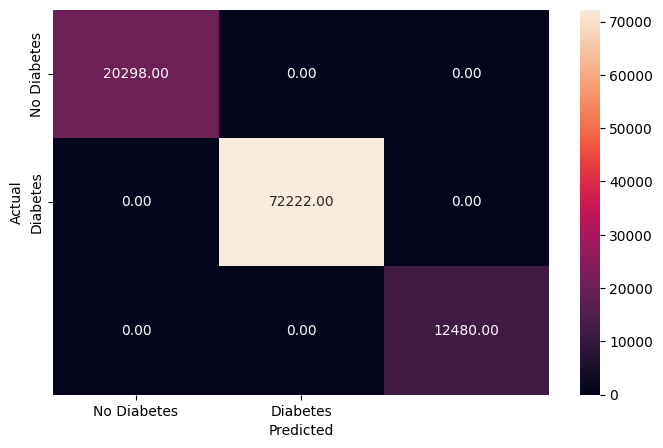

In [102]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

       500.0       1.00      1.00      1.00      8700
       600.0       0.94      0.93      0.93     30952
       750.0       0.62      0.64      0.63      5348

    accuracy                           0.91     45000
   macro avg       0.85      0.86      0.85     45000
weighted avg       0.91      0.91      0.91     45000



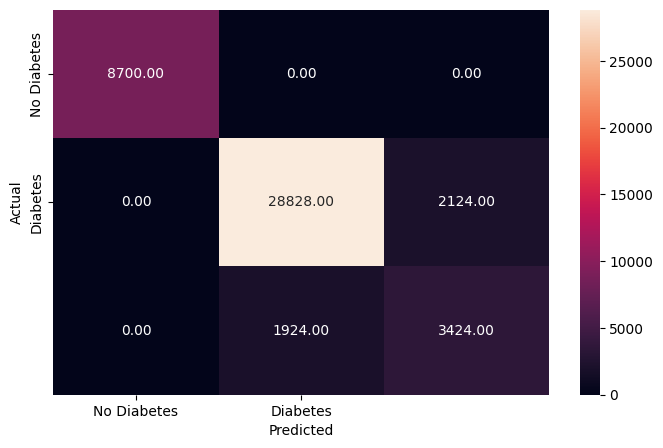

In [103]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [104]:
dtree_test = model_performance_classification(dt,x_test,y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.851531,0.857206,0.910044


In [105]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

importance_df

,Importance
Credit_Score,0.469052
Month,0.168462
Payment_of_Min_Amount_Num,0.059446
Credit_Mix_Num,0.043329
Interest_Rate,0.024553
Outstanding_Debt,0.018665
Credit_History_Age,0.018038
Total_EMI_per_month,0.015997
Monthly_Balance,0.015718
SSN,0.015623


In [107]:
dtree_estimator = DecisionTreeClassifier(class_weight = {500.0: 1, 600.0: 1, 750.0: 1})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }
scorer = metrics.make_scorer(recall_score, pos_label = 1)


gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

gridCV = gridCV.fit(x_train, y_train)

dtree_estimator = gridCV.best_estimator_

dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={500.0: 1, 600.0: 1, 750.0: 1}, max_depth=2,
                       min_samples_leaf=5)

              precision    recall  f1-score   support

       500.0       1.00      1.00      1.00      8700
       600.0       0.85      1.00      0.92     30952
       750.0       0.00      0.00      0.00      5348

    accuracy                           0.88     45000
   macro avg       0.62      0.67      0.64     45000
weighted avg       0.78      0.88      0.83     45000



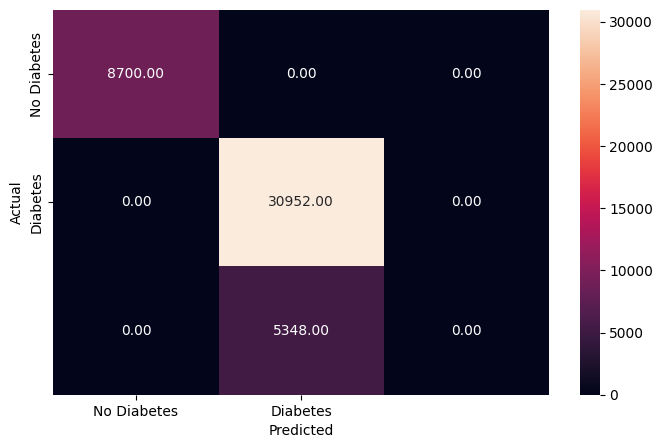

In [108]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [109]:
dtree_tuned_test = model_performance_classification(dtree_estimator,x_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.617557,0.666667,0.881156


In [110]:
importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

importance_df

,Importance
Credit_Score,0.749994
Month,0.250006
Age,0.000000
Payment_of_Min_Amount_Num,0.000000
Credit_Mix_Num,0.000000
Occupation_Num,0.000000
Monthly_Balance,0.000000
Amount_invested_monthly,0.000000
Total_EMI_per_month,0.000000
Credit_History_Age,0.000000


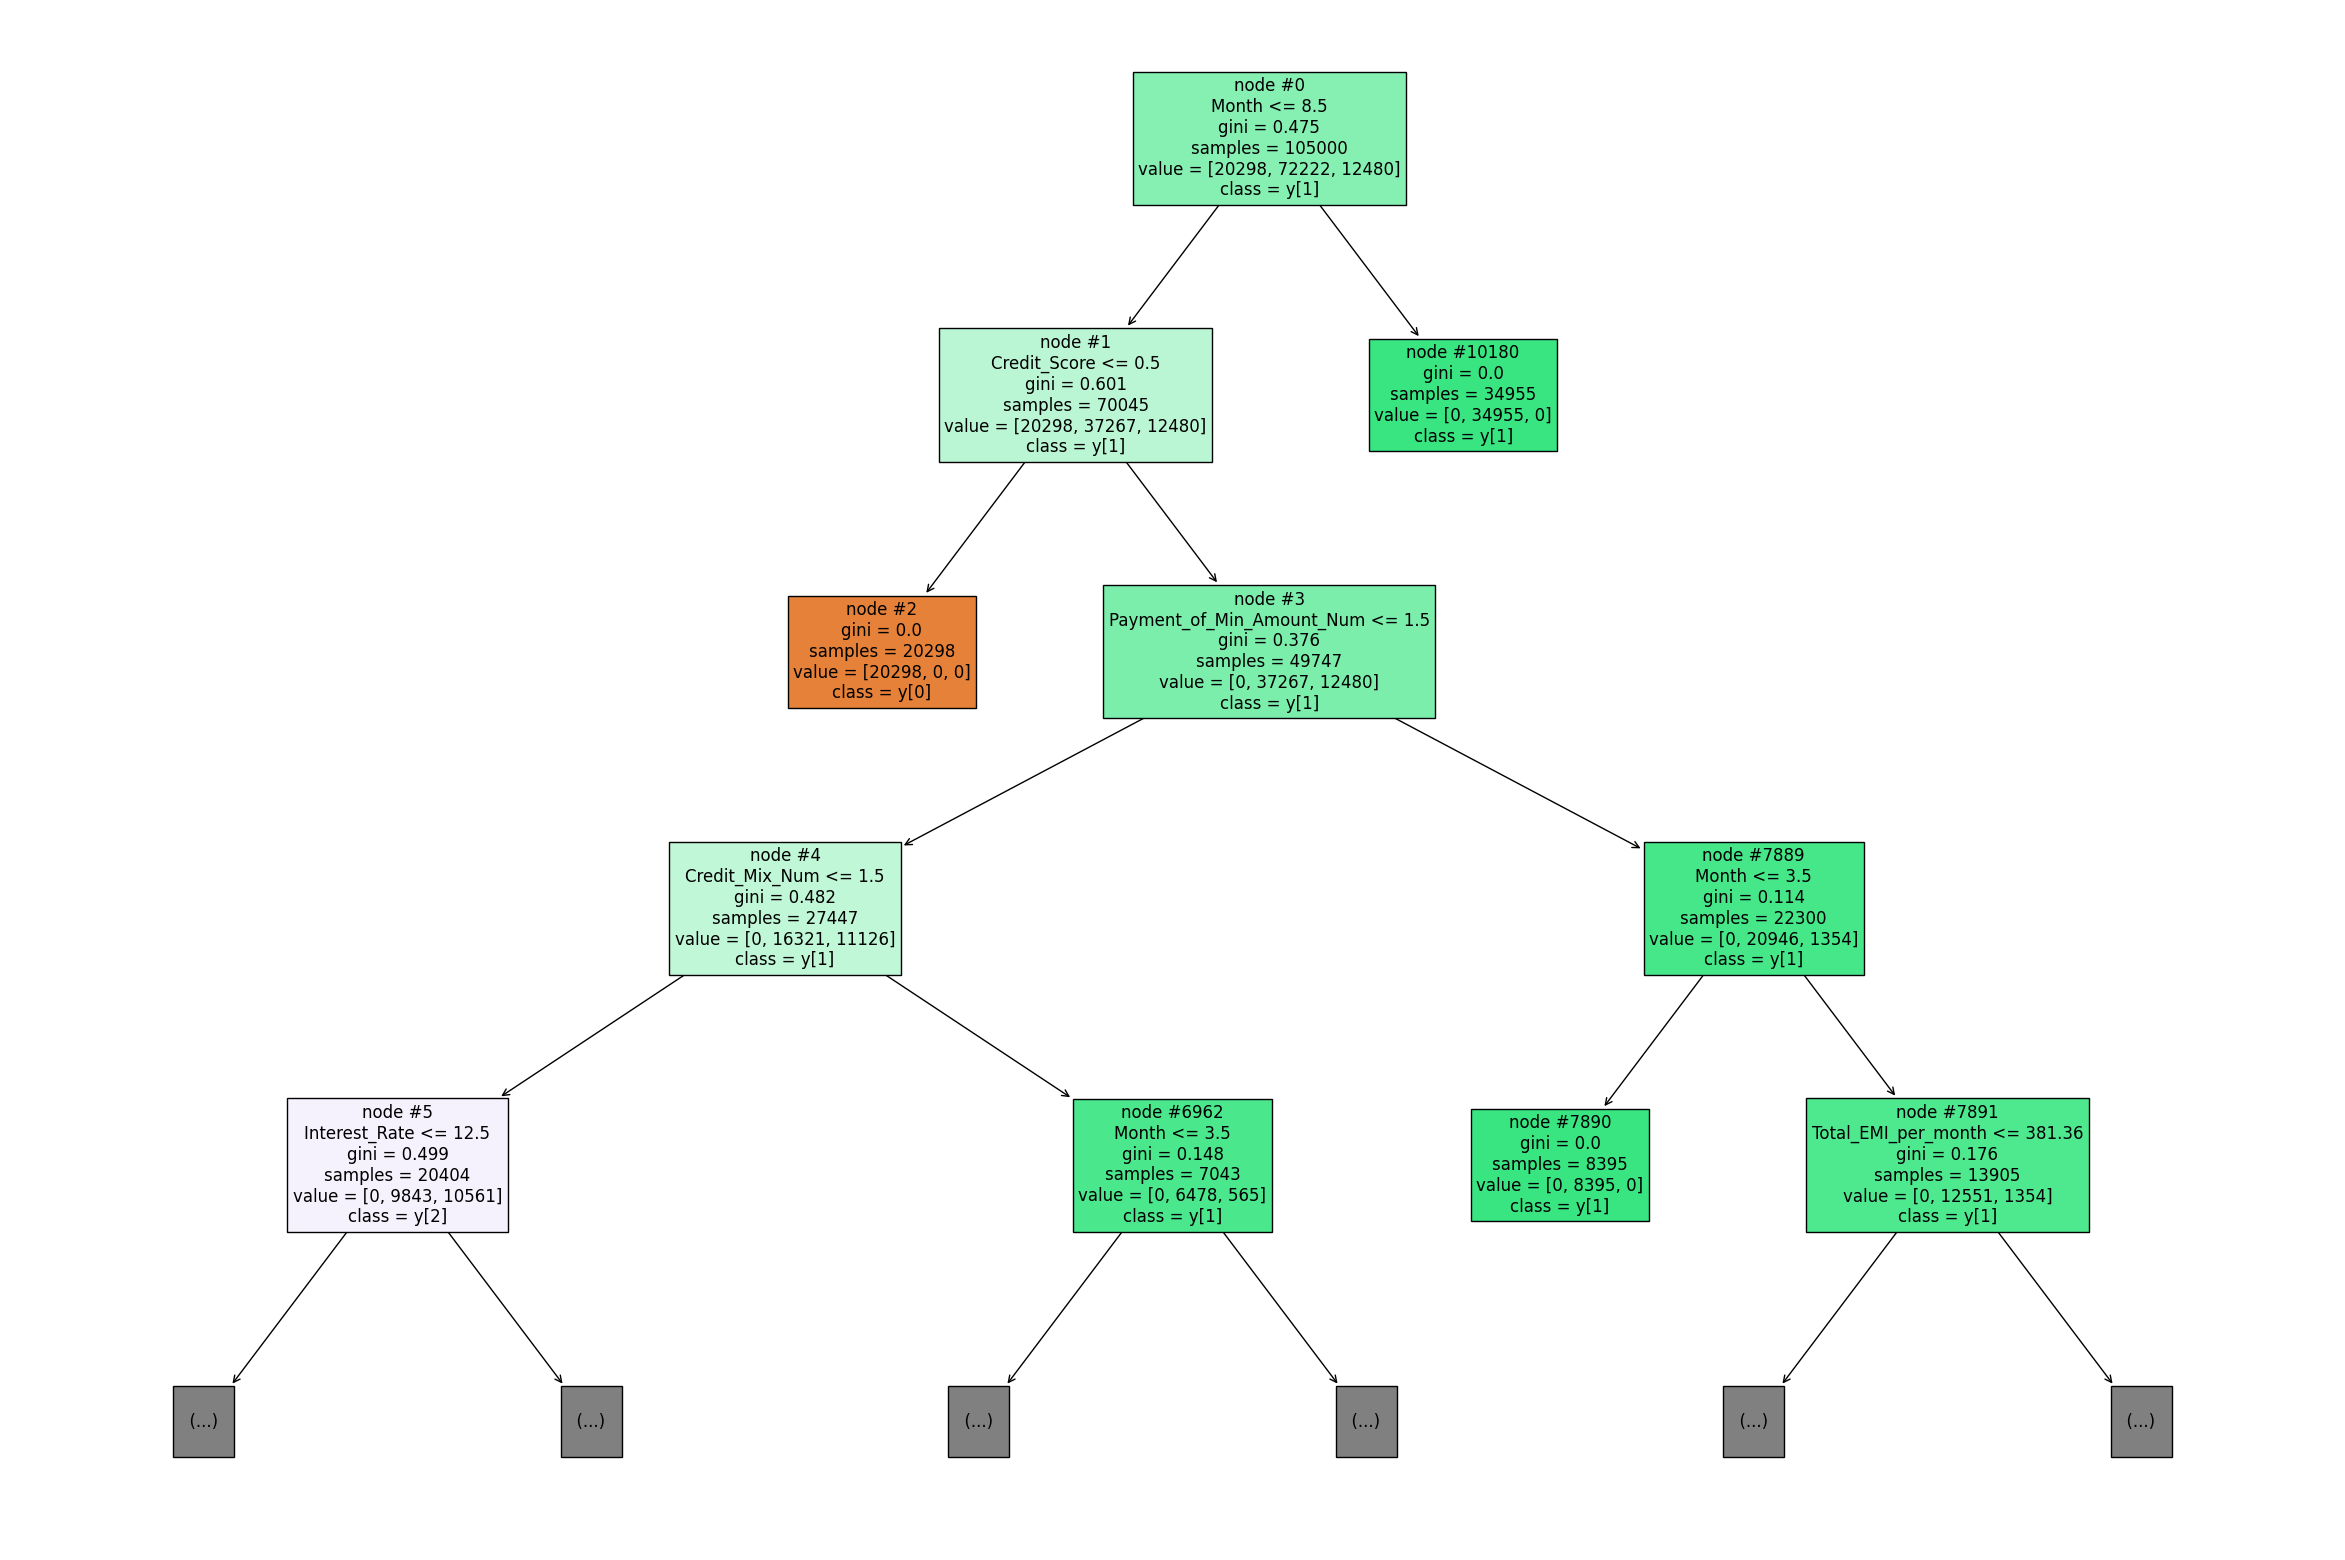

In [112]:
features = list(X.columns)
plt.figure(figsize=(30,20))
tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

In [114]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {500.0: 1, 600.0: 1, 750.0: 1}, random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={500.0: 1, 600.0: 1, 750.0: 1},
                       random_state=1)

              precision    recall  f1-score   support

       500.0       1.00      1.00      1.00     20298
       600.0       1.00      1.00      1.00     72222
       750.0       1.00      1.00      1.00     12480

    accuracy                           1.00    105000
   macro avg       1.00      1.00      1.00    105000
weighted avg       1.00      1.00      1.00    105000



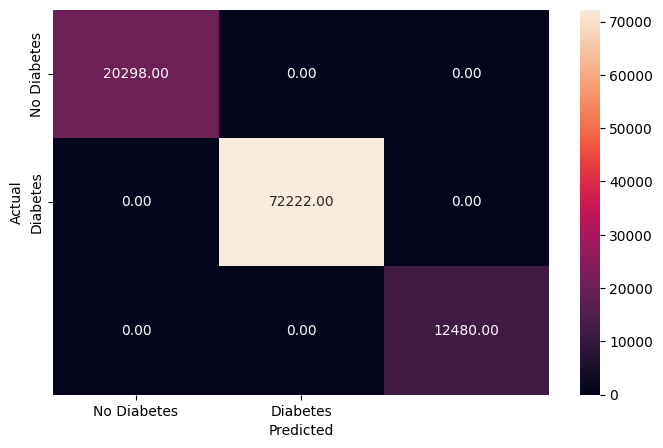

In [115]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

       500.0       1.00      1.00      1.00      8700
       600.0       0.95      0.96      0.96     30952
       750.0       0.77      0.72      0.74      5348

    accuracy                           0.94     45000
   macro avg       0.91      0.89      0.90     45000
weighted avg       0.94      0.94      0.94     45000



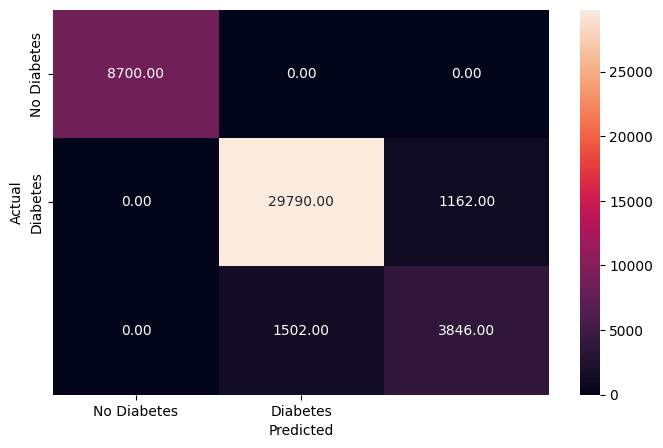

In [116]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

In [117]:
rf_estimator_test = model_performance_classification(rf_estimator,x_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.906657,0.893868,0.9408


In [118]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

importance_df

,Importance
Month,0.295856
Credit_Score,0.232027
Outstanding_Debt,0.052224
Interest_Rate,0.040481
Credit_Mix_Num,0.034334
Delay_from_due_date,0.027601
Credit_History_Age,0.027470
Changed_Credit_Limit,0.024231
Num_Credit_Inquiries,0.023486
Num_Credit_Card,0.022766


<Figure size 1300x1300 with 0 Axes>

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {500.0: 1, 600.0: 1, 750.0: 1}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_